In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
X,y = iris.data, iris.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier(max_depth=2)

In [23]:
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica')]

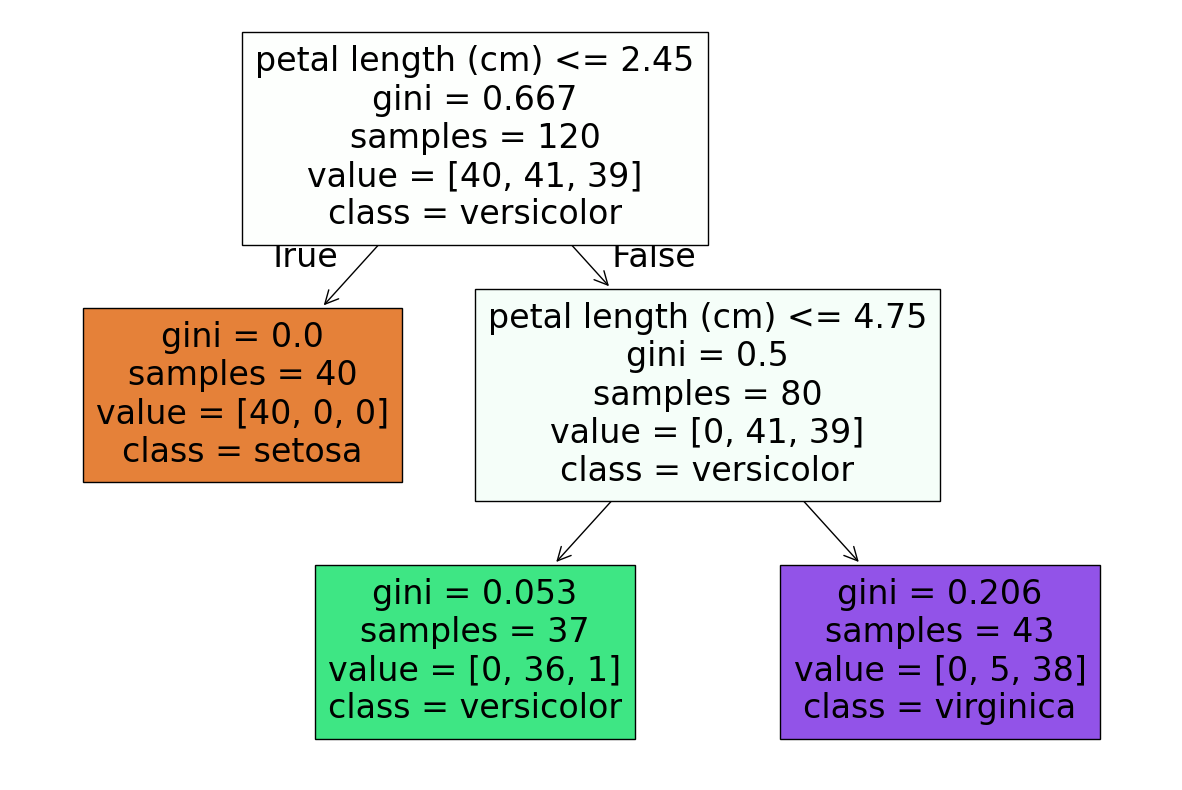

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)


In [25]:
y_pred = treeClassifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [28]:
params = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
treeModel  = DecisionTreeClassifier()
grid = GridSearchCV(treeModel, param_grid=params, cv=5,scoring='accuracy')

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [35]:
grid.best_score_

np.float64(0.9583333333333334)

In [36]:
y_pred = grid.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

